In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

# Fuel price

In [34]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)

In [35]:
df_fuel = pd.read_csv("../data/fuel_price.csv")
df_fuel.columns = ["date", "price"]
df_fuel["date"] = pd.to_datetime(df_fuel["date"])

In [38]:
df_fuel["date"]

0     2023-04-20
1     2023-04-13
2     2023-04-06
3     2023-03-30
4     2023-03-23
         ...    
941   2005-01-13
942   2005-01-06
943   2004-12-30
944   2004-12-22
945   2004-12-15
Name: date, Length: 946, dtype: datetime64[ns]

In [44]:
autocorr_values = acf(df_fuel["price"], nlags=800, fft=False)

In [61]:
[i for i, val in enumerate(autocorr_values) if val == autocorr_values[100:].max()]

[508]

In [65]:
508 / 52

9.76923076923077

In [64]:
autocorr_values[52]

0.4616407139520779

<Axes: xlabel='date', ylabel='price'>

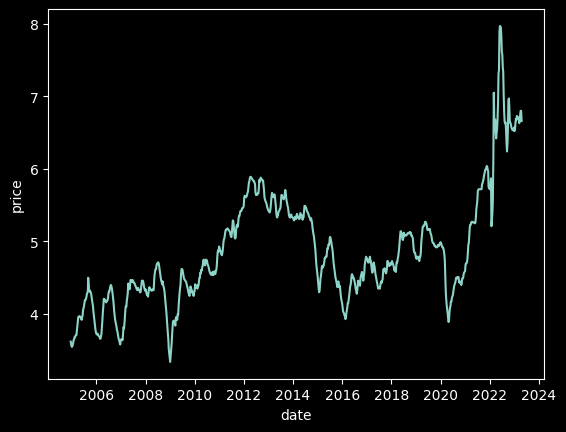

In [53]:
sns.lineplot(df_fuel, x="date", y="price")

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

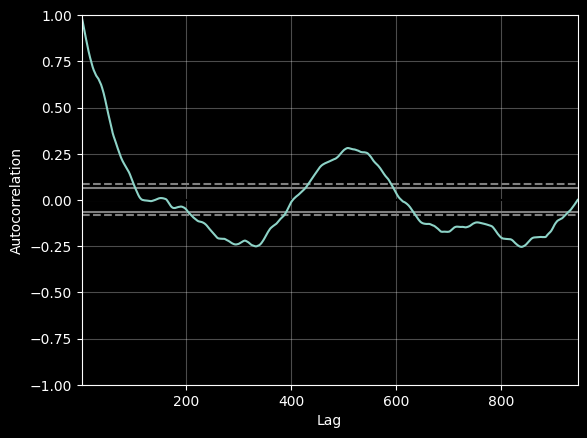

In [52]:
pd.plotting.autocorrelation_plot(df_fuel["price"])

# Electricity price

In [79]:
df_el = pd.read_csv(
    "../data/PL_CENY_RYN_EN_20230401_20230501_20230430144015.csv", sep=";"
)
df_el.columns = ["date", "hour", "price"]
df_el["id"] = range(len(df_el))

In [84]:
df_el["price"] = df_el["price"].apply(lambda x: float(x.replace(",", ".")))

<Axes: xlabel='id', ylabel='price'>

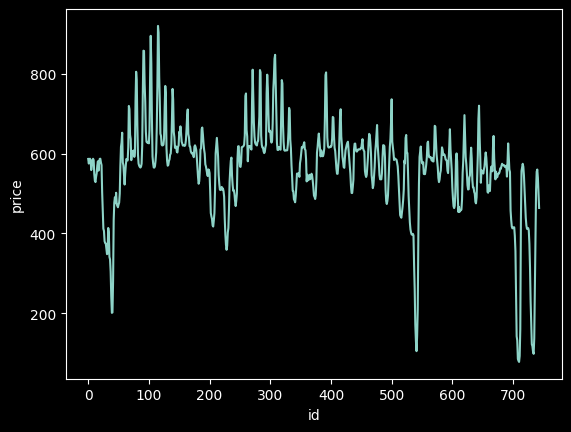

In [85]:
sns.lineplot(df_el, x="id", y="price")